In [39]:
import numpy as np
import pandas as pd

In [40]:
def f(x):
    return x * x

In [41]:
n = 10
data = pd.DataFrame({
    "y": np.array(range(n)),
    "x": f(np.array(range(n))),
    # "x2": f(np.array(range(n)))/2,
    "x3": 1,
})[["x", "x3", "y"]]
data

,x,x3,y
0,0,1,0
1,1,1,1
2,4,1,2
3,9,1,3
4,16,1,4
5,25,1,5
6,36,1,6
7,49,1,7
8,64,1,8
9,81,1,9


In [42]:
X = data[["x", "x3"]].copy()
y = data[["y"]].copy()
X

,x,x3
0,0,1
1,1,1
2,4,1
3,9,1
4,16,1
5,25,1
6,36,1
7,49,1
8,64,1
9,81,1


In [43]:
def F(x):
    return 2/(1 + np.exp(-x)) - 1

In [44]:
def L(y_true, y_pred):
    return (y_true - y_pred)**2

In [68]:
k = 3
z0 = X.iloc[k].values.reshape((2,1))

m1 = np.random.rand(2,2) * 2 - 1
# z1 = F(m1.dot(z0))
m2 = np.random.rand(2,2) * 2 - 1
# z2 = F(m2.dot(z1))
m3 = np.random.rand(2,1) * 2 - 1
# z3 = m3.dot(z2)

In [69]:
X.values.dot(m1).dot(m2).dot(m3)

array([[ 1.64249500e-03],
       [-2.13364206e-01],
       [-8.58384307e-01],
       [-1.93341781e+00],
       [-3.43846471e+00],
       [-5.37352502e+00],
       [-7.73859872e+00],
       [-1.05336858e+01],
       [-1.37587863e+01],
       [-1.74139002e+01]])

In [70]:
m1

array([[ 0.99610787, -0.40919647],
       [-0.3562812 ,  0.32474637]])

In [71]:
m1.reshape((-1,))

array([ 0.99610787, -0.40919647, -0.3562812 ,  0.32474637])

In [72]:
m2

array([[0.45606516, 0.94212781],
       [0.4986194 , 0.75088161]])

In [73]:
m3

array([[-0.82680256],
       [-0.01282273]])

In [74]:
dx = 0.01
def forward(m1, m2, m3, X):
    # return m3.dot(F(m2.dot(F(m1.dot(X)))))
    return F(F(X.dot(m1)).dot(m2)).dot(m3)

In [75]:
dx = 0.01

for i in range(10):
    m1_new = m1.copy()
    m2_new = m2.copy()
    m3_new = m3.copy()
    if i < 4:
        m1_new.reshape((-1,))[i] += dx
    elif 3 < i < 8:
        m2_new.reshape((-1,))[i-4] += dx
    elif 7 < i:
        m3_new[i-8][0] += dx
    print(i)
    print(m1_new - m1)
    print(m2_new - m2)
    print(m3_new - m3)
    print()

0
[[0.01 0.  ]
 [0.   0.  ]]
[[0. 0.]
 [0. 0.]]
[[0.]
 [0.]]

1
[[0.   0.01]
 [0.   0.  ]]
[[0. 0.]
 [0. 0.]]
[[0.]
 [0.]]

2
[[0.   0.  ]
 [0.01 0.  ]]
[[0. 0.]
 [0. 0.]]
[[0.]
 [0.]]

3
[[0.   0.  ]
 [0.   0.01]]
[[0. 0.]
 [0. 0.]]
[[0.]
 [0.]]

4
[[0. 0.]
 [0. 0.]]
[[0.01 0.  ]
 [0.   0.  ]]
[[0.]
 [0.]]

5
[[0. 0.]
 [0. 0.]]
[[0.   0.01]
 [0.   0.  ]]
[[0.]
 [0.]]

6
[[0. 0.]
 [0. 0.]]
[[0.   0.  ]
 [0.01 0.  ]]
[[0.]
 [0.]]

7
[[0. 0.]
 [0. 0.]]
[[0.   0.  ]
 [0.   0.01]]
[[0.]
 [0.]]

8
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0.01]
 [0.  ]]

9
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0.  ]
 [0.01]]



In [76]:
dx = 0.01

for i in range(10):
    m1_new = m1.copy()
    m2_new = m2.copy()
    m3_new = m3.copy()
    if i < 4:
        m1_new.reshape((-1,))[i] += dx
    elif 3 < i < 8:
        m2_new.reshape((-1,))[i-4] += dx
    elif 7 < i:
        m3_new[i-8][0] += dx
    print(i, np.mean(forward(m1_new, m2_new, m3_new, X.values) - forward(m1, m2, m3, X.values)))

0 -0.00012633668332587348
1 -0.0005320582965822761
2 -0.00019159551721850422
3 -0.0002924384225272785
4 -0.0033371668004504875
5 -5.0992960192314076e-05
6 0.003050551386793248
7 4.6744368520060156e-05
8 1.2503004023269862e-06
9 0.001026757267165833


In [84]:
dx = 0.0000001

for i in range(10):
    m1_new = m1.copy()
    m2_new = m2.copy()
    m3_new = m3.copy()
    if i < 4:
        m1_new.reshape((-1,))[i] += dx
    elif 3 < i < 8:
        m2_new.reshape((-1,))[i-4] += dx
    elif 7 < i:
        m3_new[i-8][0] += dx
    print(i, np.mean((forward(m1_new, m2_new, m3_new, X.values) - forward(m1, m2, m3, X.values))/dx))

0 -0.012723862698703348
1 -0.052238627908183365
2 -0.019170162728011832
3 -0.029224341093576568
4 -0.333706871604529
5 -0.005102192796621434
6 0.3050795271140384
7 0.0046720960630570844
8 0.00012503003162965266
9 0.10267572671116476


In [85]:
dx = 0.000001

for i in range(10):
    m1_new = m1.copy()
    m2_new = m2.copy()
    m3_new = m3.copy()
    if i < 4:
        m1_new.reshape((-1,))[i] += dx
    elif 3 < i < 8:
        m2_new.reshape((-1,))[i-4] += dx
    elif 7 < i:
        m3_new[i-8][0] += dx
    print(i, np.mean(2*(forward(m1, m2, m3, X.values) - y.values)))

0 -9.002839916513526
1 -9.002839916513526
2 -9.002839916513526
3 -9.002839916513526
4 -9.002839916513526
5 -9.002839916513526
6 -9.002839916513526
7 -9.002839916513526
8 -9.002839916513526
9 -9.002839916513526


In [86]:
dx = 0.000001

for i in range(10):
    m1_new = m1.copy()
    m2_new = m2.copy()
    m3_new = m3.copy()
    if i < 4:
        m1_new.reshape((-1,))[i] += dx
    elif 3 < i < 8:
        m2_new.reshape((-1,))[i-4] += dx
    elif 7 < i:
        m3_new[i-8][0] += dx
    print(i, np.mean(2*(forward(m1, m2, m3, X.values) - y.values)*\
                       (forward(m1_new, m2_new, m3_new, X.values) - forward(m1, m2, m3, X.values))/dx))

0 0.03488720208379157
1 0.22281214622291995
2 0.022478650923425117
3 0.05985526118593286
4 3.650483543039474
5 0.05600584299345405
6 -3.546206703244276
7 -0.05444263085712523
8 0.12491234775303213
9 -0.9356002076992631


In [81]:
mu = 0.001
dx = 0.000001

for i in range(10):
    m1_new = m1.copy()
    m2_new = m2.copy()
    m3_new = m3.copy()
    if i < 4:
        m1_new.reshape((-1,))[i] += dx
    elif 3 < i < 8:
        m2_new.reshape((-1,))[i-4] += dx
    elif 7 < i:
        m3_new[i-8][0] += dx
    print(i, mu*np.mean(2*(forward(m1_new, m2_new, m3_new, X_new.values) - y_new.values)*\
                       (forward(m1_new, m2_new, m3_new, X_new.values) - forward(m1, m2, m3, X_new.values))/dx))

NameError: name 'X_new' is not defined

In [87]:
m1.shape, m2.shape, m3.shape

((2, 2), (2, 2), (2, 1))

In [88]:
def transform_w(m1, m2, m3):
    return np.concatenate([m1.reshape((-1,)), m2.reshape((-1,)), m3.reshape((-1,))])

def w_transform(m):
    return m[:4].reshape((2,2)), m[4:8].reshape((2,2)), m[8:].reshape((2,1))

In [89]:
m1,m2,m3

(array([[ 0.99610787, -0.40919647],
        [-0.3562812 ,  0.32474637]]),
 array([[0.45606516, 0.94212781],
        [0.4986194 , 0.75088161]]),
 array([[-0.82680256],
        [-0.01282273]]))

In [90]:
w_transform(transform_w(m1, m2, m3))

(array([[ 0.99610787, -0.40919647],
        [-0.3562812 ,  0.32474637]]),
 array([[0.45606516, 0.94212781],
        [0.4986194 , 0.75088161]]),
 array([[-0.82680256],
        [-0.01282273]]))

In [91]:
mu = 0.001
dx = 0.000001

m = transform_w(m1,m2,m3).copy()
for i in range(10):
    m = transform_w(m1,m2,m3).copy()
    m[i] += dx
    m1_new, m2_new, m3_new = w_transform(m)
    print(i, mu*np.mean(2*(forward(m1_new, m2_new, m3_new, X.values) - y.values)*\
                       (forward(m1_new, m2_new, m3_new, X.values) - forward(m1, m2, m3, X.values))/dx))

0 3.488720392323294e-05
1 0.0002228121672130925
2 2.2478654255093137e-05
3 5.985526651632565e-05
4 0.00365048381681324
5 5.6005843057532446e-05
6 -0.0035462064567323816
7 -5.444263079913455e-05
8 0.00012491235006449955
9 -0.0009356001801449937


In [92]:
def get_new_w(m1,m2,m3):
    mu = 0.01
    dx = 0.000001
    m = transform_w(m1,m2,m3).copy()
    l = []
    for i in range(10):
        m = transform_w(m1,m2,m3).copy()
        m[i] += dx
        m1_new, m2_new, m3_new = w_transform(m)
        l.append(mu*np.mean(2*(forward(m1_new, m2_new, m3_new, X.values) - y.values)*\
                           (forward(m1_new, m2_new, m3_new, X.values) - forward(m1, m2, m3, X.values))/dx))
    l = np.array(l)
    m_new = m - l
    return w_transform(m_new)

In [95]:
m1_new = m1.copy()
m2_new = m2.copy()
m3_new = m3.copy()

for i in range(30000):
    if i % 1000 == 0:
        print(transform_w(m1_new, m2_new, m3_new), 
          np.mean((forward(m1_new, m2_new, m3_new, X.values) - y.values)**2))
    m1_new, m2_new, m3_new = get_new_w(m1_new, m2_new, m3_new)

[ 0.99610787 -0.40919647 -0.3562812   0.32474637  0.45606516  0.94212781
  0.4986194   0.75088161 -0.82680256 -0.01282273] 28.407902312625833
[ 0.9943085  -0.43531647 -0.35746625  0.31728258  0.09547107  0.95627216
  0.84940527  0.73708574 -0.98508763  0.08139987] 25.459417256954755
[ 0.99589736 -0.46663749 -0.35621743  0.3063534  -0.24880489  1.00795312
  1.18512491  0.68644923 -1.36922597  0.19172266] 21.459789701156083
[ 1.00037935 -0.49445078 -0.3517313   0.29253624 -0.53865914  1.09431138
  1.46874254  0.601327   -1.85081496  0.33372239] 17.127017669505385
[ 1.00553047 -0.51153211 -0.34385262  0.27725455 -0.75881387  1.20749457
  1.68554656  0.4890284  -2.32874908  0.50913666] 13.312049365951129
[ 1.00827957 -0.51477109 -0.33330601  0.26195088 -0.91844699  1.33263908
  1.84472047  0.36389053 -2.75415923  0.70578099] 10.284346511878192
[ 1.00592996 -0.50195748 -0.32116877  0.24807756 -1.03097913  1.45279898
  1.95966295  0.24241404 -3.11049323  0.9036922 ] 8.061895931714997
[ 0.997

In [96]:
m1_best, m2_best, m3_best = w_transform(np.array([ 0.84713666, -0.04051949,  0.60856412,  0.54491283,
                                                  -0.68331969,  2.17433275, 2.67322983, -0.61386561,
                                                  -5.44314228,  2.66261746]))

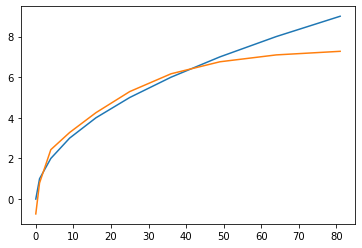

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X.x, y)
plt.plot(X.x, forward(m1_best, m2_best, m3_best, X.values))

In [100]:
forward(m1_best, m2_best, m3_best, X.values)

array([[-0.73100189],
       [ 0.79253394],
       [ 2.43238554],
       [ 3.27644198],
       [ 4.25205038],
       [ 5.29173569],
       [ 6.16779789],
       [ 6.75847533],
       [ 7.09702207],
       [ 7.27357354]])

In [102]:
L(y.values, forward(m1_best, m2_best, m3_best, X.values))

array([[0.53436376],
       [0.04304216],
       [0.18695725],
       [0.07642017],
       [0.0635294 ],
       [0.08510971],
       [0.02815613],
       [0.05833416],
       [0.81536913],
       [2.98054833]])

In [103]:
np.mean(L(y.values, forward(m1_best, m2_best, m3_best, X.values)))

0.48718302226846477

In [26]:
m1 = np.random.rand(2,3) * 2 - 1
m2 = np.random.rand(3,2) * 2 - 1
m3 = np.random.rand(2,1) * 2 - 1

In [28]:
F(F(X.values.dot(m1)).dot(m2)).dot(m3)

array([[ 0.00145774],
       [-0.00784801],
       [-0.00753555],
       [ 0.02536077],
       [ 0.04712986],
       [ 0.05328737],
       [ 0.0542736 ],
       [ 0.05437201],
       [ 0.05437831],
       [ 0.05437857]])

In [197]:
m2.dot(F(m1.dot(X.T.values)))

array([[-0.16683339, -0.35789249, -0.68758545, -0.78224426, -0.79049288,
        -0.79084088, -0.79084797, -0.79084804, -0.79084804, -0.79084804],
       [ 0.29195539,  0.03018514, -0.53536325, -0.63068967, -0.63330729,
        -0.63341681, -0.63341946, -0.63341948, -0.63341948, -0.63341948],
       [-0.57817528, -0.71577887, -0.87759418, -0.98741781, -1.00338619,
        -1.00412573, -1.00414093, -1.00414106, -1.00414106, -1.00414106]])

In [214]:
def get_new_w(m1,m2,m3):
    mu = 0.0001
    dx = 0.000001
    m = transform_w(m1,m2,m3).copy()
    l = []
    for i in range(18):
        m = transform_w(m1,m2,m3).copy()
        m[i] += dx
        m1_new, m2_new, m3_new = w_transform(m)
        l.append(mu*np.mean(2*(forward(m1_new, m2_new, m3_new, X.T.values).T - y.values)*\
                           (forward(m1_new, m2_new, m3_new, X.T.values) - forward(m1, m2, m3, X.T.values))/dx
                           ))
    l = np.array(l)
    m_new = m - l
    return w_transform(m_new)

In [215]:
def forward(m1, m2, m3, X):
    return m3.dot(F(m2.dot(F(m1.dot(X)))))

def transform_w(m1, m2, m3):
    return np.concatenate([m1.reshape((-1,)), m2.reshape((-1,)), m3.reshape((-1,))])

def w_transform(m):
    return m[:6].reshape((3,2)), m[6:15].reshape((3,3)), m[15:].reshape((1,3))

In [216]:
m1_new = m1.copy()
m2_new = m2.copy()
m3_new = m3.copy()

for i in range(30000):
    if i % 1000 == 0:
        print(transform_w(m1_new, m2_new, m3_new), 
          np.mean((forward(m1_new, m2_new, m3_new, X.T.values).T - y.values)**2))
    m1_new, m2_new, m3_new = get_new_w(m1_new, m2_new, m3_new)

[-0.62408843 -0.32666484  0.42732917  0.81899954 -0.83048502  0.72533999
  0.36235232 -0.34950484  0.07899088 -0.33755694 -0.13617191  0.83480451
  0.73698131 -0.75001065 -0.4828509   0.25503661  0.71639847  0.68272318] 34.39869324817742
[-0.62265615 -0.32462835  0.40931079  0.80346513 -0.81981937  0.73604291
  0.32182381 -0.30747815  0.04336463 -0.59559834  0.13016096  0.60529273
  0.55596669 -0.56284741 -0.64305104 -0.021724    0.64654329  0.37305981] 28.857807701432584
[-0.63752116 -0.34229988  0.41321868  0.80702201 -0.81349166  0.74263534
  0.36957345 -0.35677608  0.0850821  -0.84495     0.38686718  0.38482098
  0.4518045  -0.45581785 -0.73579927 -0.27877499  0.84061635  0.22657336] 24.889000138041332
[-0.6645242  -0.37889472  0.43336077  0.82678161 -0.81208576  0.74488627
  0.48148501 -0.4723943   0.18108657 -1.08636349  0.63686535  0.17936761
  0.38844785 -0.39090317 -0.7919626  -0.5722357   1.20869433  0.16977718] 19.88875484284913
[-0.69669226 -0.43063363  0.46152449  0.860127

In [104]:
Xmean = X["x"].mean()
Xstd = X["x"].std()
Xmean, Xstd

(28.5, 28.3048876815766)

In [105]:
y_mean = y.mean()
y_std = y.std()
y_mean, y_std

(y    4.5
 dtype: float64,
 y    3.02765
 dtype: float64)

In [106]:
X_new = X.copy()
X_new["x"] = (X["x"] - X["x"].mean())/X["x"].std()

y_new = (y - y_mean)/y_std

X_new

,x,x3
0,-1.006893,1
1,-0.971564,1
2,-0.865575,1
3,-0.688927,1
4,-0.441620,1
5,-0.123654,1
6,0.264972,1
7,0.724257,1
8,1.254200,1
9,1.854803,1


In [107]:
y_new

,y
0,-1.486301
1,-1.156012
2,-0.825723
3,-0.495434
4,-0.165145
5,0.165145
6,0.495434
7,0.825723
8,1.156012
9,1.486301


In [108]:
def get_new_w_new(m1,m2,m3):
    mu = 0.001
    dx = 0.0000001
    m = transform_w(m1,m2,m3).copy()
    l = []
    for i in range(10):
        m = transform_w(m1,m2,m3).copy()
        m[i] += dx
        m1_new, m2_new, m3_new = w_transform(m)
        l.append(mu*np.mean(2*(forward(m1, m2, m3, X_new.values) - y_new.values)*\
                           (forward(m1_new, m2_new, m3_new, X_new.values) - \
                            forward(m1, m2, m3, X_new.values))/dx))
    l = np.array(l)
    m_new = m - l
    return w_transform(m_new)

In [109]:
m1_new = m1.copy()
m2_new = m2.copy()
m3_new = m3.copy()

for i in range(30000):
    if i % 1000 == 0:
        print(transform_w(m1_new, m2_new, m3_new), 
          np.mean((forward(m1_new, m2_new, m3_new, X_new.values) - y_new.values)**2))
    m1_new, m2_new, m3_new = get_new_w_new(m1_new, m2_new, m3_new)

[ 0.99610787 -0.40919647 -0.3562812   0.32474637  0.45606516  0.94212781
  0.4986194   0.75088161 -0.82680256 -0.01282273] 0.9776522696555967
[ 0.94534021 -0.56589558 -0.360747    0.3136237   0.16212829  0.97341431
  0.65896057  0.73273663 -0.8291131   0.18344762] 0.7931232113751447
[ 1.00932047 -0.71925955 -0.34920962  0.29192332 -0.11193317  1.05433846
  0.84981458  0.67598546 -0.98306249  0.3449099 ] 0.5912130669435911
[ 1.14401922 -0.88115162 -0.30513468  0.24504721 -0.36847713  1.1581623
  1.05105922  0.59434755 -1.22678208  0.49778897] 0.3354583998388592
[ 1.26796704 -1.0050971  -0.22010714  0.1658768  -0.54819822  1.24518323
  1.20108846  0.52162056 -1.4433431   0.61722135] 0.15955747259966416
[ 1.33587659 -1.06892635 -0.11770661  0.07416163 -0.63920997  1.29586423
  1.2807114   0.47742809 -1.57110739  0.68638026] 0.08967456725113293
[ 1.36313353 -1.09427195 -0.02719336 -0.00596428 -0.68007745  1.32153595
  1.31856497  0.4540827  -1.63653361  0.72167553] 0.06327109858656055
[ 1.

In [110]:
m1_best, m2_best, m3_best = w_transform(np.array([ 1.37594626, -1.12741176,  0.16061829, -0.17083759,
                                                  -0.72794504,  1.34820424, 1.36592511, 0.4329915,
                                                  -1.70856245,  0.76538068]))

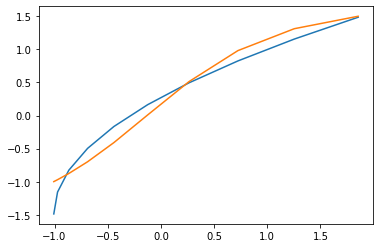

In [112]:
plt.plot(X_new.x, y_new)
plt.plot(X_new.x, forward(m1_best, m2_best, m3_best, X_new.values))

In [181]:
np.mean(L(y_new.values.T, forward(m1_best, m2_best, m3_best, X_new.T.values)[0]))

0.9091190562976788